In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
from datetime import datetime

In [19]:
df1 = pd.read_csv('cleaned_forest_data.csv')
df2 = pd.read_csv('cleaned_grassland_data.csv')
df = pd.read_csv('cleaned_combined_data.csv')

In [20]:
distance_map = {
    '<= 50 Meters': 'Closer to observer',
    '50 - 100 Meters': 'Farther from observer',
    'Unknown': 'Closer to observer'
}

df['Distance'] = df['Distance'].map(distance_map)

In [21]:
dist_analysis = df.groupby(['Location_Type','Distance'])['Initial_Three_Min_Cnt'].sum().reset_index(name='count')

In [22]:
dist_analysis

,Location_Type,Distance,count
0,Forest,Closer to observer,2415
1,Forest,Farther from observer,2245
2,Grassland,Closer to observer,1372
3,Grassland,Farther from observer,1735


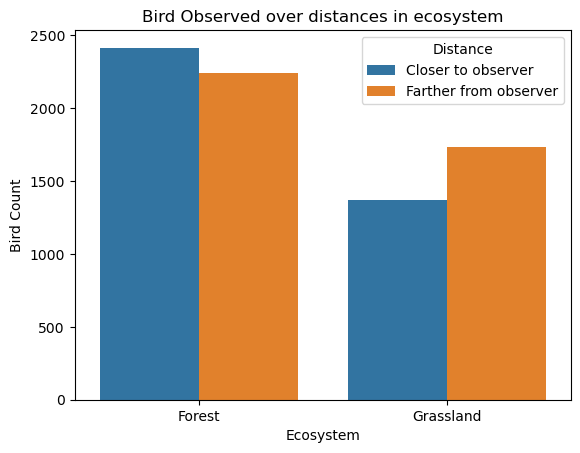

In [27]:
sns.barplot(
    data = dist_analysis,
    x= 'Location_Type',
    y= 'count',
    hue = 'Distance'
)
plt.xlabel('Ecosystem')
plt.ylabel('Bird Count')
plt.title('Bird Observed over distances in ecosystem')
plt.show()

In [31]:
species_dist_analysis = df.groupby(['Location_Type','Distance','Common_Name'])['Flyover_Observed'].sum().reset_index(name='count')

In [33]:
top_species = species_dist_analysis.groupby('Common_Name')['count'].sum().nlargest(20).index

In [34]:
top_species

Index(['Common Grackle', 'American Goldfinch', 'Barn Swallow',
       'Turkey Vulture', 'American Crow', 'Red-winged Blackbird',
       'Mourning Dove', 'European Starling', 'Tree Swallow', 'Blue Jay',
       'Cedar Waxwing', 'Unidentified Crow', 'American Robin', 'Fish Crow',
       'Brown-headed Cowbird', 'Great Blue Heron',
       'Northern Rough-winged Swallow', 'Bald Eagle', 'Canada Goose',
       'Chimney Swift'],
      dtype='object', name='Common_Name')

In [36]:
species_dist_analysis = species_dist_analysis[species_dist_analysis['Common_Name'].isin(top_species)]

In [37]:
species_dist_analysis

,Location_Type,Distance,Common_Name,count
1,Forest,Closer to observer,American Crow,13
2,Forest,Closer to observer,American Goldfinch,4
4,Forest,Closer to observer,American Robin,2
6,Forest,Closer to observer,Barn Swallow,2
15,Forest,Closer to observer,Blue Jay,5
...,...,...,...,...
335,Grassland,Farther from observer,Northern Rough-winged Swallow,0
348,Grassland,Farther from observer,Red-winged Blackbird,0
354,Grassland,Farther from observer,Tree Swallow,0
355,Grassland,Farther from observer,Turkey Vulture,0


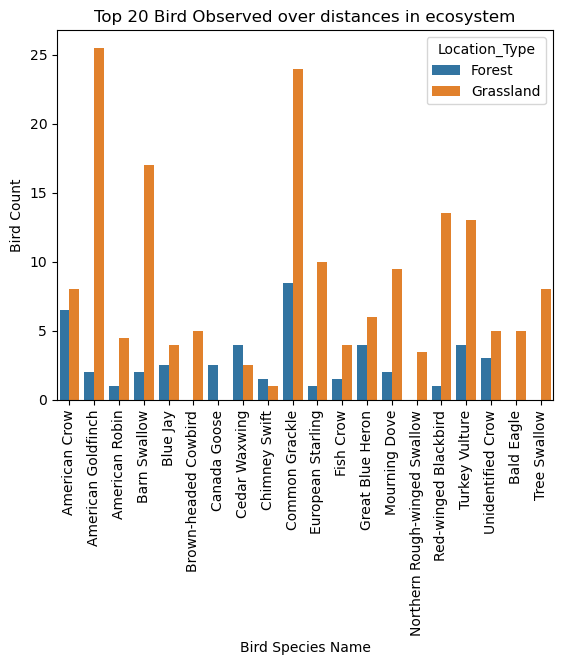

In [40]:
sns.barplot(
    data = species_dist_analysis,
    x= 'Common_Name',
    y= 'count',
    hue = 'Location_Type',
    errorbar=None
)
plt.xlabel('Bird Species Name')
plt.ylabel('Bird Count')
plt.xticks(rotation=90)
plt.title('Top 20 Bird Observed over distances in ecosystem')
plt.show()

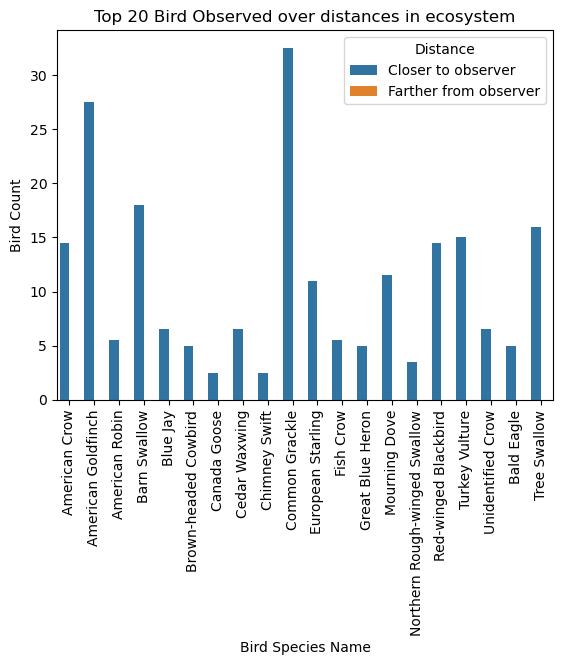

In [41]:
sns.barplot(
    data = species_dist_analysis,
    x= 'Common_Name',
    y= 'count',
    hue = 'Distance',
    errorbar=None
)
plt.xlabel('Bird Species Name')
plt.ylabel('Bird Count')
plt.xticks(rotation=90)
plt.title('Top 20 Bird Observed over distances in ecosystem')
plt.show()

In [50]:
flyover = df.groupby(['Date'])['Flyover_Observed'].sum().reset_index(name='count')

In [53]:
flyover = flyover[flyover['count']>5].reset_index(drop=True)

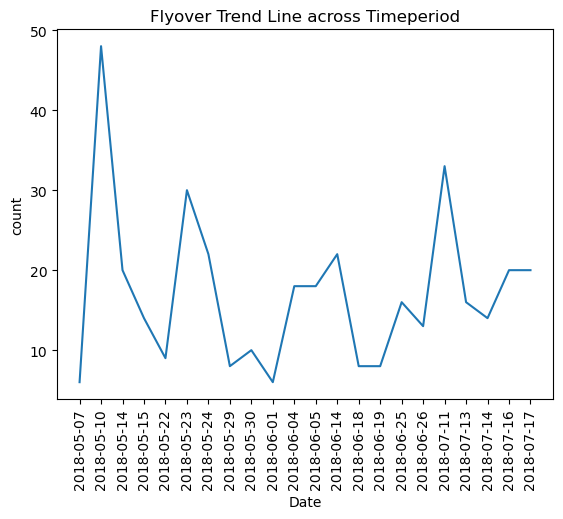

In [55]:
sns.lineplot(
    data = flyover,
    x = 'Date',
    y = 'count'
)
plt.title('Flyover Trend Line across Timeperiod')
plt.xticks(rotation=90)
plt.show()

In [56]:
observer_analysis = df.groupby(['Location_Type','Observer'])['Flyover_Observed'].sum().reset_index(name='count')

In [57]:
observer_analysis

,Location_Type,Observer,count
0,Forest,Brian Swimelar,34
1,Forest,Elizabeth Oswald,35
2,Forest,Kimberly Serno,21
3,Grassland,Brian Swimelar,134
4,Grassland,Elizabeth Oswald,136
5,Grassland,Kimberly Serno,85


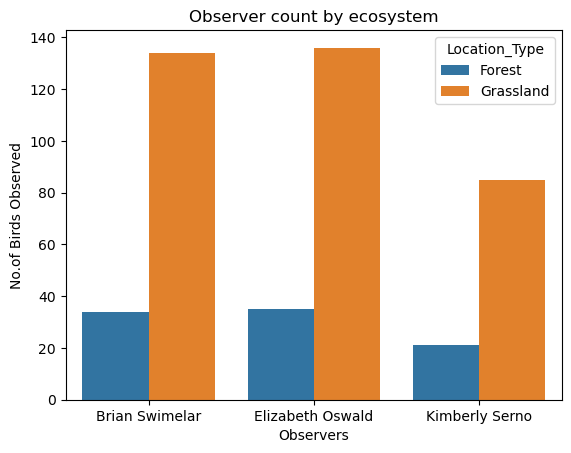

In [68]:
sns.barplot(
    data = observer_analysis,
    x='Observer',
    y='count',
    hue='Location_Type'
)
plt.xlabel('Observers')
plt.ylabel('No.of Birds Observed')
plt.title('Observer count by ecosystem')
plt.show()

In [82]:
observer1 = df.groupby(['Observer','Visit'])['Flyover_Observed'].sum().reset_index(name='count')

In [83]:
observer1 = observer1[observer1['count']>0].reset_index(drop=True)

In [84]:
observer1

,Observer,Visit,count
0,Brian Swimelar,1,92
1,Brian Swimelar,2,44
2,Brian Swimelar,3,32
3,Elizabeth Oswald,1,69
4,Elizabeth Oswald,2,51
5,Elizabeth Oswald,3,51
6,Kimberly Serno,1,47
7,Kimberly Serno,2,35
8,Kimberly Serno,3,24


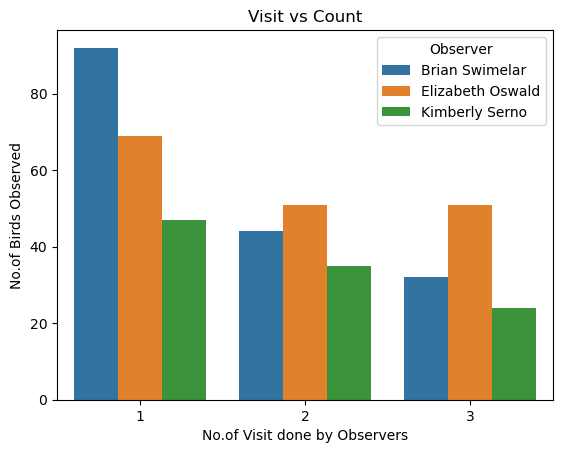

In [88]:
sns.barplot(
    data = observer1,
    x='Visit',
    y='count',
    hue= 'Observer'
)
plt.xlabel('No.of Visit done by Observers')
plt.ylabel('No.of Birds Observed')
plt.title('Visit vs Count')
plt.show()